In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out
2022_Mar_week2_Weighted_mean_calculation_Beuermann_2011_combined.txt
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev1.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev2.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P_rev.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P_rev.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P_rev2.ipynb
DP_Leo_LTT_fit_Indirect_Linear_paramet

In [3]:
#Read data ---#1
#Input = "2022_Mar_week2_Weighted_mean_calculation_Beuermann_2011_combined.txt"
Input = "2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out"
Data   = np.genfromtxt(Input)

BJD_time = Data[:,0]
OC = Data[:,1]
OC_err = Data[:,2]

In [4]:
#Linear phemeris equation(From equation 1) convert from TT to TDB
#New ephemeris
#BJD0 = 2448773.21461 - 2400000
#P0 = 0.0623628426

#Schwope_2002
BJD0 = 2448773.215071 - 2400000
dBJD0 = 0.000018
P0 = 0.06236283691
dP0 = 0.00000000070

In [5]:
#t = T0_bjd + P0_day*Epoch
x = BJD_time
y = OC
dy = OC_err

#len_x = len(x)
#print(len_x)
#print(x)

t = BJD_time
len_x = len(t)

In [6]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

In [7]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [8]:
#Parameters
m = 0
c = 0
K = 33.7       
P = 10220       
e = 0              
w = -1.36         
tau = 53025   

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    f = m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
#    print(x[i], MAno[i], EAno[i], f[i])
    output.append('%0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i], f[i]))
    
data_out = output
f = open("e_output_a.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

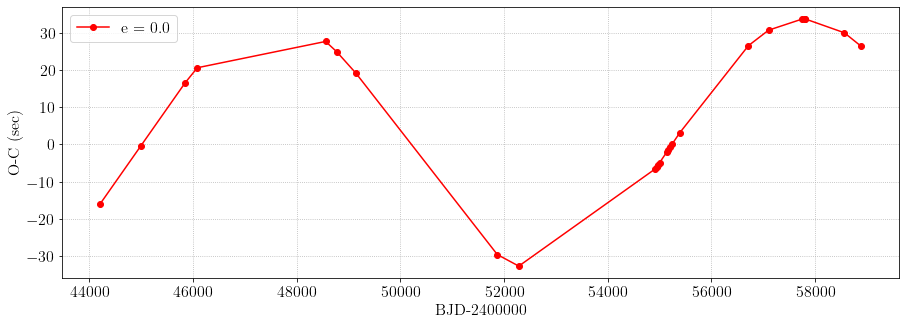

In [9]:
InputFile_out = "e_output_a.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_a = Data_out[:,0]
y_a = Data_out[:,3]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label='e = 0.0')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [10]:
#Parameters
m = 0
c = 0
K = 33.7       
P = 10220       
e = 0.2              
w = -1.36           
tau = 53025  

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    f = m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
#    print(x[i], MAno[i], EAno[i], f[i])
    output.append('%0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i], f[i]))
    
data_out = output
f = open("e_output_b.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

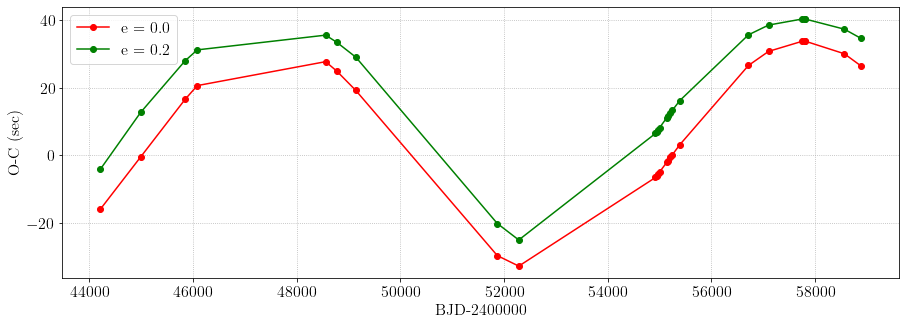

In [11]:
InputFile_out = "e_output_b.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_b = Data_out[:,0]
y_b = Data_out[:,3]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label='e = 0.0')
plt.plot(x_b, y_b, '-o', color='green',label='e = 0.2')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [12]:
#Parameters
m = 0
c = 0
K = 33.7       
P = 10220      
e = 0.4               
w = -1.36           
tau = 53025   

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    f = m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
#    print(x[i], MAno[i], EAno[i], f[i])
    output.append('%0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i], f[i]))
    
data_out = output
f = open("e_output_c.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

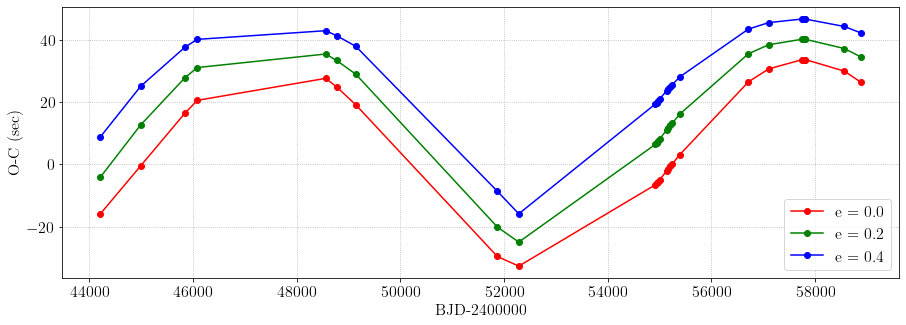

In [13]:
InputFile_out = "e_output_c.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_c = Data_out[:,0]
y_c = Data_out[:,3]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label='e = 0.0')
plt.plot(x_b, y_b, '-o', color='green',label='e = 0.2')
plt.plot(x_c, y_c, '-o', color='blue',label='e = 0.4')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [14]:
#Parameters
m = 0
c = 0
K = 33.7      
P = 10220      
e = 0.6              
w = -1.36         
tau = 53025   

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    f = m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
#    print(x[i], MAno[i], EAno[i], f[i])
    output.append('%0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i], f[i]))
    
data_out = output
f = open("e_output_d.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

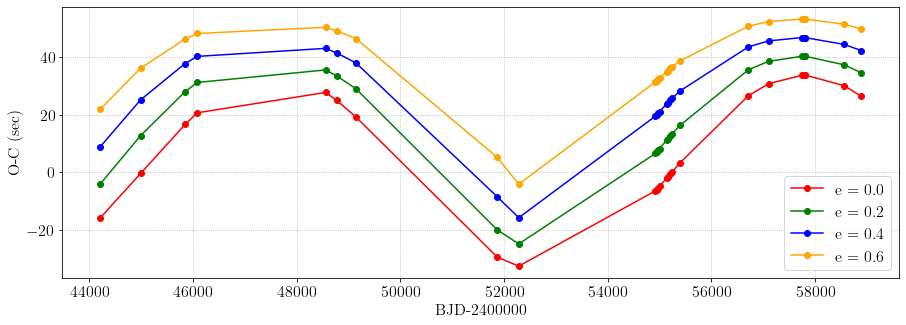

In [15]:
InputFile_out = "e_output_d.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_d = Data_out[:,0]
y_d = Data_out[:,3]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label='e = 0.0')
plt.plot(x_b, y_b, '-o', color='green',label='e = 0.2')
plt.plot(x_c, y_c, '-o', color='blue',label='e = 0.4')
plt.plot(x_d, y_d, '-o', color='orange',label='e = 0.6')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [16]:
#Parameters
m = 0
c = 0
K = 33.7       
P = 10220      
e = 0.8               
w = -1.36          
tau = 53025   

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    f = m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
#    print(x[i], MAno[i], EAno[i], f[i])
    output.append('%0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i], f[i]))
    
data_out = output
f = open("e_output_e.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

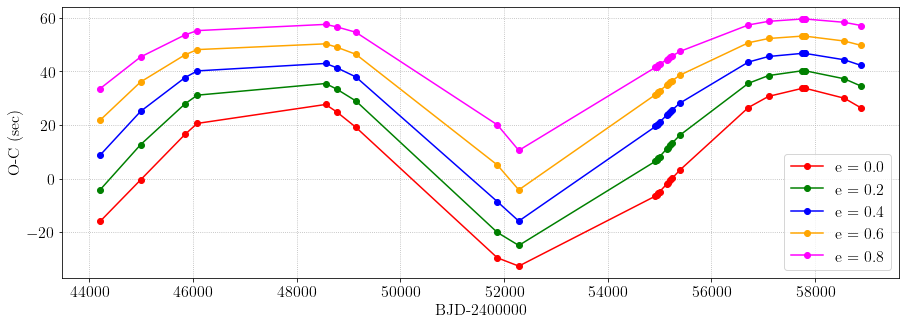

In [17]:
InputFile_out = "e_output_e.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_e = Data_out[:,0]
y_e = Data_out[:,3]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label='e = 0.0')
plt.plot(x_b, y_b, '-o', color='green',label='e = 0.2')
plt.plot(x_c, y_c, '-o', color='blue',label='e = 0.4')
plt.plot(x_d, y_d, '-o', color='orange',label='e = 0.6')
plt.plot(x_e, y_e, '-o', color='magenta',label='e = 0.8')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
plt.savefig("DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_e_rev.pdf", format='pdf', dpi=1200)
plt.show()